In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
print(os.listdir())

['.config', 'drive', 'sample_data']


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Now you can proceed with reading the CSV
# df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/employee_salary.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/employee_salary.csv')

<ipython-input-32-53256ed8fb82>:1: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/employee_salary.csv')


In [ ]:
df.shape

(312882, 9)

In [ ]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


In [ ]:
print(df.isnull().sum())

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64


In [ ]:
df['Year'] = df['Year'].astype(int)
print(df.dtypes)

EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object


In [ ]:
# Filter out rows where TotalPay or TotalPayBenefits are 0 or negative
df = df[(df['TotalPay'] > 0) & (df['TotalPayBenefits'] > 0)]

# Check updated dataset
df.describe()

,TotalPay,TotalPayBenefits,Year
count,312173.000000,312173.000000,312173.000000
mean,78981.625208,101141.490339,2014.625246
std,53158.372642,66409.363813,2.291859
min,0.010000,0.010000,2011.000000
25%,39340.140000,49563.520000,2013.000000
50%,75031.820000,100172.370000,2015.000000
75%,111519.740000,142506.390000,2017.000000
max,592394.340000,712802.360000,2018.000000


In [ ]:
# Group by job title and get the mean TotalPay
job_salary = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending =False).head(10)

<ipython-input-39-60d718dbf82a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_salary.values, y=job_salary.index,


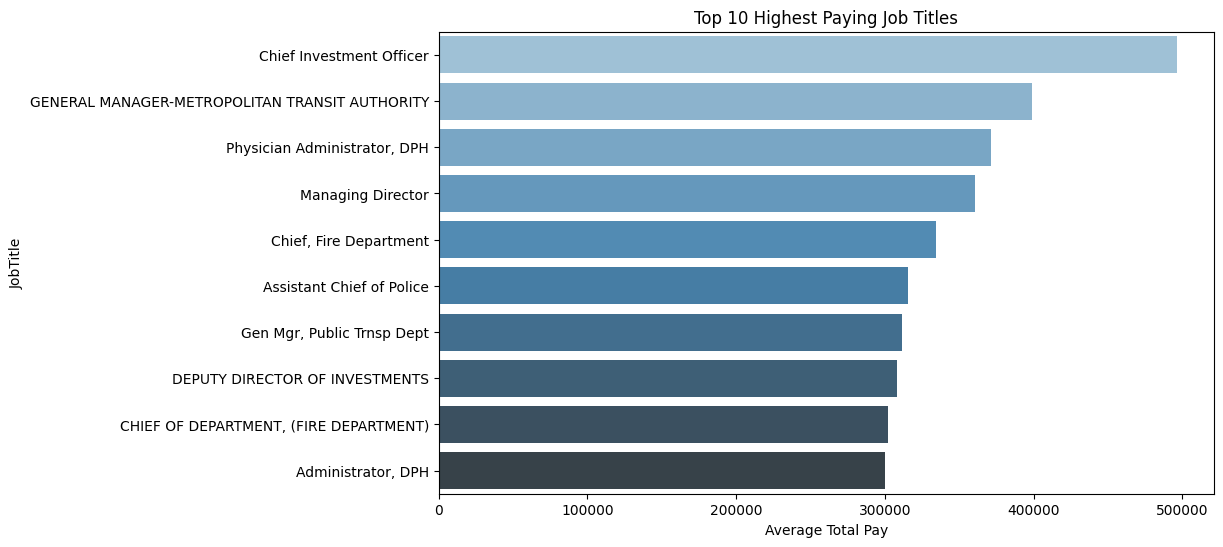

In [ ]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=job_salary.values, y=job_salary.index,
palette='Blues_d')
plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Average Total Pay')
plt.show()

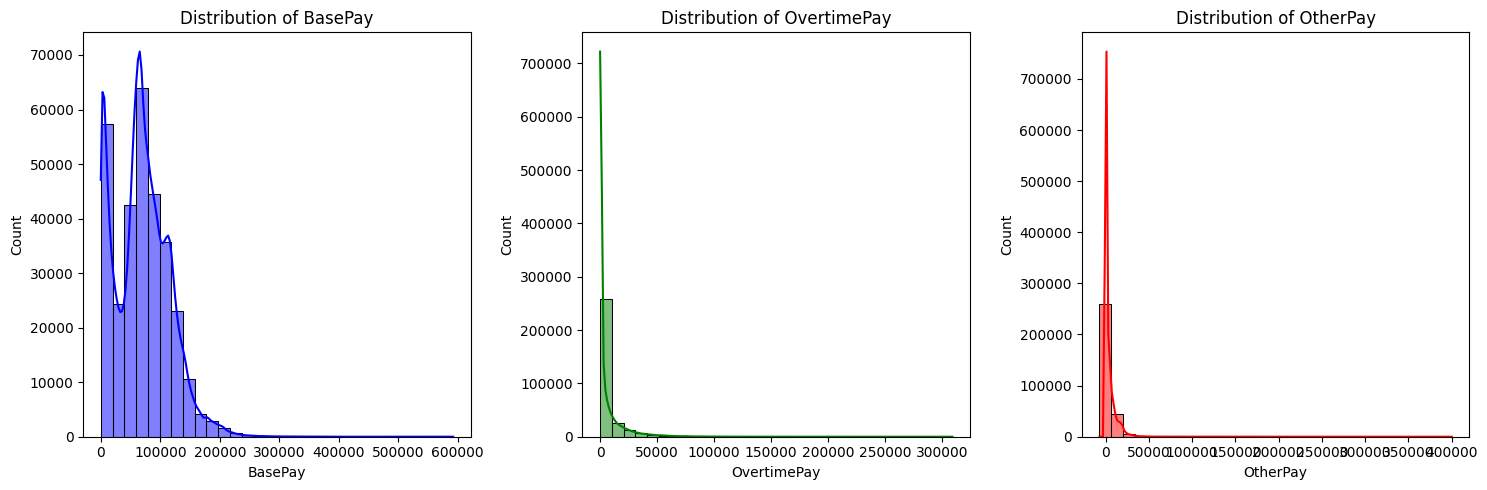

In [ ]:
# Plot histograms for BasePay, OvertimePay, and OtherPay

# Replace 'Not Provided' strings with np.nan in the relevant columns
cols_to_clean = ['BasePay', 'OvertimePay', 'OtherPay'] # Only need to clean these columns for the histplots
for col in cols_to_clean:
    if col in df.columns: # Check if the column exists in the dataframe
        # Use .loc to avoid SettingWithCopyWarning
        df.loc[df[col] == 'Not Provided', col] = np.nan

# Convert the columns to numeric, coercing errors to NaN
for col in cols_to_clean:
     if col in df.columns:
         df[col] = pd.to_numeric(df[col], errors='coerce')

# Now plot histograms
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(df['BasePay'], bins=30, kde=True, color='blue')
plt.title('Distribution of BasePay')
plt.subplot(1,3,2)
sns.histplot(df['OvertimePay'], bins=30, kde=True,
color='green')
plt.title('Distribution of OvertimePay')

plt.subplot(1,3,3)
sns.histplot(df['OtherPay'], bins=30, kde=True, color='red')
plt.title('Distribution of OtherPay')

plt.tight_layout()
plt.show()

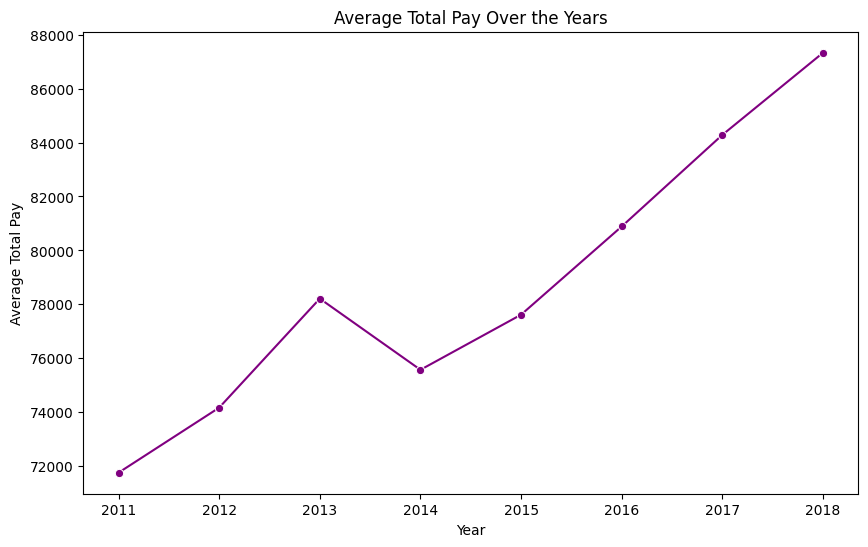

In [ ]:
# Group by Year and calculate mean total pay
pay_over_years = df.groupby('Year')['TotalPay'].mean()

# Plot
plt.figure(figsize=(10,6))

sns.lineplot(x=pay_over_years.index, y=pay_over_years.values,
marker='o', color='purple')
plt.title('Average Total Pay Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Total Pay')
plt.show()

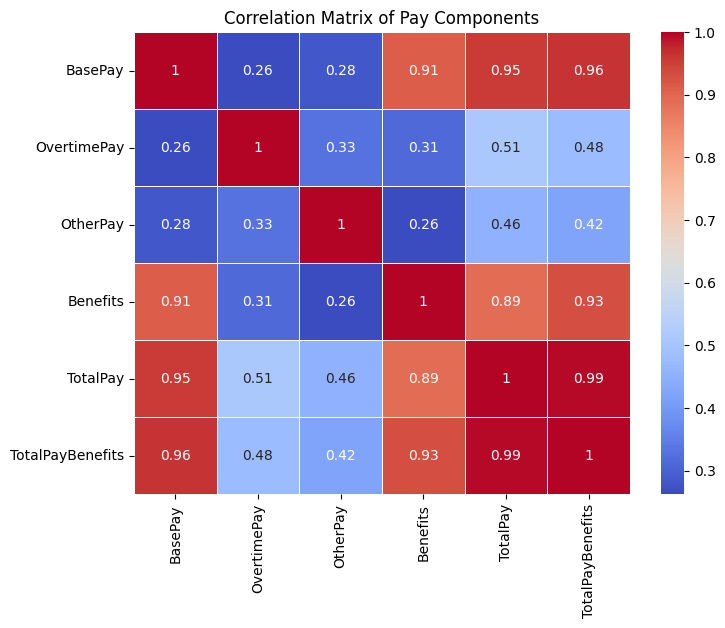

In [ ]:
# Correlation matrix
plt.figure(figsize=(8,6))

# Replace 'Not Provided' strings with np.nan in the relevant columns
cols_to_clean = ['BasePay', 'OvertimePay', 'OtherPay','Benefits', 'TotalPay', 'TotalPayBenefits']
for col in cols_to_clean:
    if col in df.columns: # Check if the column exists in the dataframe
        # Use .loc to avoid SettingWithCopyWarning
        df.loc[df[col] == 'Not Provided', col] = np.nan

# Convert the columns to numeric, coercing errors to NaN
for col in cols_to_clean:
     if col in df.columns:
         df[col] = pd.to_numeric(df[col], errors='coerce')


# Drop rows where any of the relevant columns have NaN values after cleaning
# This is one approach; alternatively, you could fill NaNs with a value like 0 or the mean
df_corr = df[cols_to_clean].dropna()

# Calculate the correlation matrix on the cleaned data
corr_matrix = df_corr.corr()

# Plotting heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix of Pay Components')
plt.show()

In [ ]:
# Encoding JobTitle using one-hot encoding
df = pd.get_dummies(df, columns=['JobTitle'], drop_first=True)

# Display new dataframe
df.head()

EmployeeName    BasePay  OvertimePay   OtherPay  Benefits   TotalPay  \
0     NATHANIEL FORD  167411.18         0.00  400184.25       NaN  567595.43   
1       GARY JIMENEZ  155966.02    245131.88  137811.38       NaN  538909.28   
2     ALBERT PARDINI  212739.13    106088.18   16452.60       NaN  335279.91   
3  CHRISTOPHER CHONG   77916.00     56120.71  198306.90       NaN  332343.61   
4    PATRICK GARDNER  134401.60      9737.00  182234.59       NaN  326373.19   

   TotalPayBenefits  Year  JobTitle_ACCOUNTANT  JobTitle_ACCOUNTANT INTERN  \
0         567595.43  2011                False                       False   
1         538909.28  2011                False                       False   
2         335279.91  2011                False                       False   
3         332343.61  2011                False                       False   
4         326373.19  2011                False                       False   

   JobTitle_ACPO,JuvP, Juv Prob (SFERS)  JobTitle_ACUPUNCTURIST  \
0                                 False                   False   
1                                 False                   False   
2                                 False                   False   
3                                 False                   False   
4                                 False                   False   

   JobTitle_ADMINISTRATIVE ANALYST  JobTitle_ADMINISTRATIVE ANALYST II  \
0                            False                               False   
1                            False                               False   
2                            False                               False   
3                            False                               False   
4                            False                               False   

   JobTitle_ADMINISTRATIVE ANALYST III  JobTitle_ADMINISTRATIVE ENGINEER  \
0                                False                             False   
1                                False                             False   
2                                False                             False   
3                                False                             False   
4                                False                             False   

   JobTitle_ADMINISTRATIVE SERVICES MANAGER  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   JobTitle_ADMINISTRATOR, SFGH MEDICAL CENTER  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   JobTitle_AFFIRMATIVE ACTION SPECIALIST  JobTitle_AGRICULTURAL INSPECTOR  \
0                                   False                            False   
1                                   False                            False   
2                                   False                            False   
3                                   False                            False   
4                                   False                            False   

   JobTitle_AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI  \
0                                              False             
1                                              False             
2                                              False             
3                                              False             
4                                              False             

   JobTitle_AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS  \
0                                              False        
1                                              False        
2                                              False        
3                                              False       

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop(columns=['EmployeeName', 'TotalPayBenefits'])
y = df['TotalPayBenefits']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import numpy as np # Import numpy if not already imported

# Make sure to handle NaNs before splitting the data for the model
# Drop rows with any NaN values from the dataframe
# This ensures that the features (X) and target (y) used for training
# and testing the LinearRegression model do not contain missing values.
# This line requires the 'df' variable to be defined from previous cells.
df_model = df.dropna()

# Features and target variable
# Use the cleaned dataframe (df_model) for splitting
X = df_model.drop(columns=['EmployeeName', 'TotalPayBenefits'])
y = df_model['TotalPayBenefits']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)

# Initialize and train the model
model = LinearRegression()
# Now X_train should not contain NaNs
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

Mean Absolute Error: 4.729750033447367e-11
R-squared Score: 1.0


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

Mean Absolute Error: 4.729750033447367e-11
R-squared Score: 1.0


In [11]:
!git clone https://github.com/Venkateswar8703/-San-Francisco-Employee-Compensation-Analysis-and-Prediction.git

fatal: destination path '-San-Francisco-Employee-Compensation-Analysis-and-Prediction' already exists and is not an empty directory.
